<a href="https://colab.research.google.com/github/piusAI/DeepLearning_Basic/blob/main/Chap04_05_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.5 Activate DL Algorithm
##Lecture 9, Numerical Gradient Activation!

### TwoLayerNet

In [4]:
#PrePare functions
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
  if x.ndim ==2:
    x = x - np.max(x, axis=1, keepdims=1)
    y = np.exp(x) / np.sum(np.exp(x),axis=1, keepdims=1)

  else :
    x = x - np.max(x)
    y = np.exp(x) / np.sum(np.exp(x))

  return y

def CEE(y,t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  batch_size = y.shape[0]
  return -np.sum(y[np.arange(batch_size),t]) / batch_size

def _numerical_gradient_no_batch(f,x):
  h = 1e-4
  grad= np.zeros_like(x)
  for i in range(x.size):
    tmp_val = x[i]
    x[i] = tmp_val +h
    fxh1 = f(x)

    x[i] = tmp_val -h
    fxh2 = f(x)

    grad[i] = ( fxh1 - fxh2 ) / ( 2 * h )
    x[i] = tmp_val
    return grad

def numerical_gradient(f,X):
  if X.ndim==1:
    return _numerical_gradient_no_batch(f,X)
  else :
    grad = np.zeros_like(X)
    for i, idx in enumerate(X):
      grad[i] = _numerical_gradient_no_batch(f,idx)
    return grad

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.param={}
    self.param['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.param['b1'] = np.zeros(hidden_size)
    self.param['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.param['b2'] = np.zeros(output_size)
  def predict(self, x):
    W1, W2 = self.param['W1'], self.param['W2']
    b1, b2 = self.param['b1'], self.param['b2']

    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    return y
  def accuracy(self, x,t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)
    accuracy = np.sum(y==t) / float(x.shape[0]) #select Correct y==t, Divide X's Rows
    return accuracy

  def loss(self, x, t):
    y = self.predict(x)
    loss = CEE(y,t)
    return loss
  def numerical_gradient(self, x, t):
    loss_w= lambda W : self.loss(x,t) # loss_w is like Function, Lambda W is Wrapper!

    grad = {}
    grad['W1'] = numerical_gradient(loss_w, self.param['W1'])
    grad['b1'] = numerical_gradient(loss_w, self.param['b1'])
    grad['W2'] = numerical_gradient(loss_w, self.param['W2'])
    grad['b2'] = numerical_gradient(loss_w, self.param['b2'])
    return grad

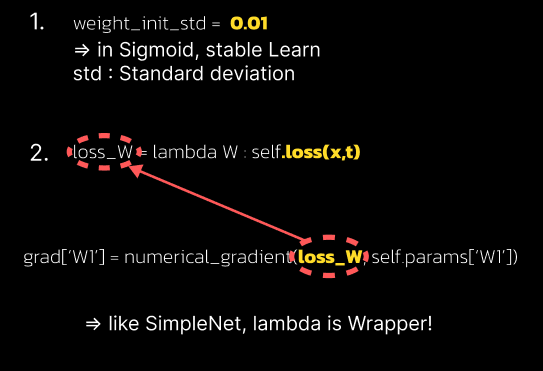

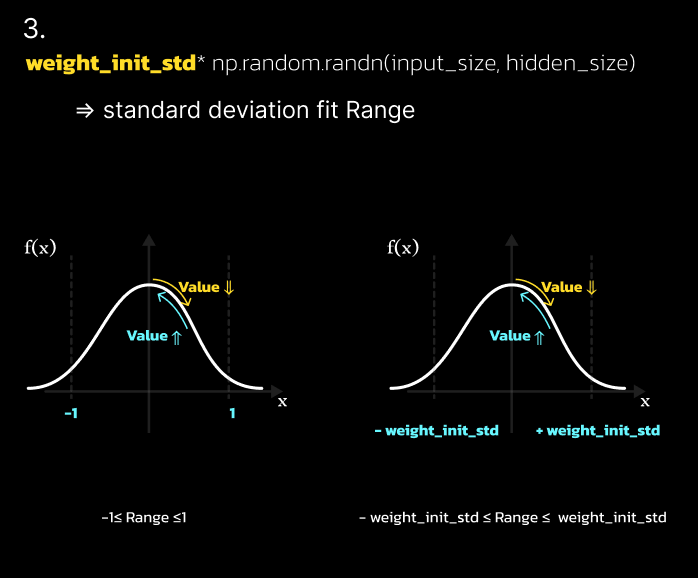

**weight_init_std**

std : standard deviation, Fit range Standard Distribution




In [11]:
net1 = TwoLayerNet(3,3,3)
net2 = TwoLayerNet(784, 50, 10)


print(net1.param)
#self.param['W1'] <= self : [InstanceName]


{'W1': array([[ 0.0059    ,  0.01052897, -0.01720098],
       [ 0.00235379, -0.00452121,  0.01142356],
       [-0.0060354 , -0.0125119 ,  0.01671642]]), 'b1': array([0., 0., 0.]), 'W2': array([[-0.00774183, -0.00156592, -0.00240824],
       [-0.00683925, -0.00862371,  0.00965331],
       [-0.00449348, -0.0141222 , -0.00763615]]), 'b2': array([0., 0., 0.])}


*Mnist* Data  =>  Dictionary 형식(Form)

*Neural NetWork* Data : Weight + Bias Data



```
self.param['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
```

dic["Key"] = value

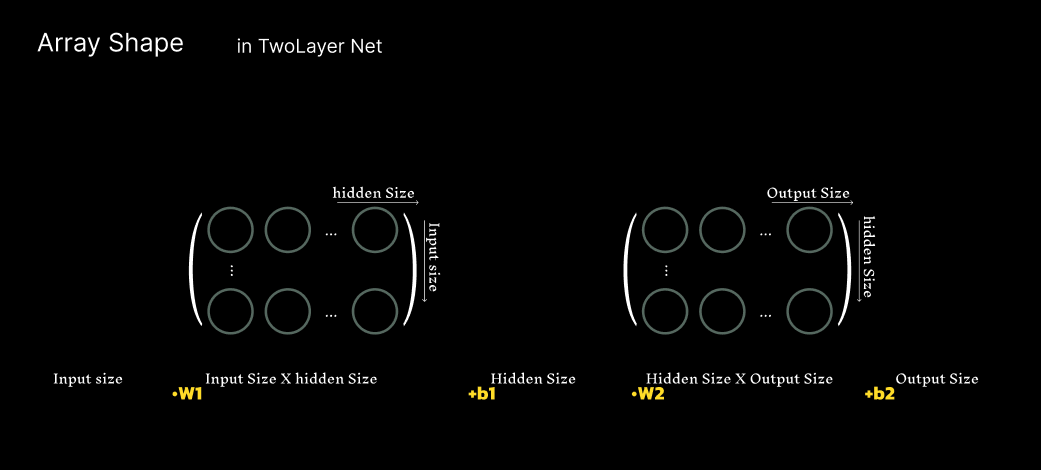

Init Value

이런식으로 실제 학습시, Weight는 랜덤하게, Bias는 0으로 초기화.


| 항목     | 초기화 방식                | 이유                             |
| ------ | --------------------- | ------------------------------ |
| Weight | **random, 초기화** (정규/균등 분포) | 뉴런마다 다른 출발점 필요                 |
| Bias   | **0, 초기화**           | 학습 중 자동으로 최적화되며, 초기에는 차이 없어도 됨 |
